In [1]:
import numpy as np
import pandas as pd

import matplotlib.ticker as ticker
from matplotlib import cm

from py.plots.plotting import plotQuadrants, plotTraceDeterminant

import matplotlib.pyplot as plt

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

In [8]:
path = '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/'
plt.style.use(path + 'template.mplstyle')

def setAxes(df, nmb):
    
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    
    nmb_labels = 5
                
    idx_x = np.linspace(0,len(df.columns.values)-1, nmb_labels).astype(int)
    idx_y = np.linspace(0,len(df.index.values)-1, nmb_labels).astype(int)
        
    xliste= np.round(df.columns.values, decimals=2)[idx_x]
    yliste= np.round(df.index.values, decimals=2)[idx_y]
    
    #xliste = np.linspace(xaxis[0],xaxis[-1],nmb_labels)
    #yliste = np.linspace(yaxis[-1],yaxis[0],nmb_labels)
    
    xlabels=list('%.1f'%(e) for e in xliste)
    ylabels=list('%.1f'%(e) for e in yliste)
    
    return xlabels, ylabels

def plotDiscreteMap(df, xaxis='I_e', yaxis='I_i', scatters=False,
                    title='State space for default values', colorbar=True):
    
    p_colors = cm.get_cmap('Accent', 4)#('Accent', 4)
    
    stabis = df.pivot_table('stability', columns=xaxis, index=yaxis)
    turings = df.pivot_table('turing', columns=xaxis, index=yaxis)
    p_randoms = df.pivot_table('p_random', columns=xaxis, index=yaxis)
    p_downs = df.pivot_table('p_down', columns=xaxis, index=yaxis) #kommentiere diese zeile aus, falls multistabi nicht erhoben wird
    compare = p_randoms.eq(p_downs) #kommentiere diese zeile aus, falls multistabi nicht erhoben wird

    
    fig, ax = plt.subplots(1,1,figsize=(12,12))
    
    unstable_color = 'white'
    stable_color='black'
    
    
    nmb_labels = 5
                
    xlabels, ylabels = setAxes(stabis, nmb_labels)
    
  #  pos = ax.imshow(stabis, origin='lower', vmin=1, vmax=4, aspect='auto', interpolation='gaussian', cmap='gist_gray')#cmap=p_colors) #
    pos = ax.imshow(p_randoms, origin='lower', vmin=1, vmax=4, aspect='auto', cmap=p_colors, alpha=0.7) #
    c1 = ax.contour(stabis, origin='lower', vmin=0, vmax=2, levels=1, colors=[unstable_color, stable_color, 'green'])
    c2 = ax.contour(turings, origin='lower', vmin=0, vmax=1, levels=0, colors=[unstable_color], 
               linestyles='dashed')
    c3 = ax.contour(compare, origin='lower', vmin=0, vmax=1, levels=0, colors=[stable_color], 
               linestyles='dashed') #kommentiere diese zeile aus, falls multistabi nicht erhoben wird
    
#    ax.text(130, 135, 'Bistable', fontsize=20, bbox=dict(facecolor='none', alpha=1, 
#                                          edgecolor=stable_color, pad=5, linewidth=3))
#    ax.text(122, 60, 'Multistable', fontsize=20, bbox=dict(facecolor='none', alpha=1, 
#                                          edgecolor=stable_color, pad=5, linewidth=3, linestyle='dashed'))
    #ax.annotate('Multistable', fontsize=20, bbox=dict(facecolor='none', alpha=1, 
    #                                      edgecolor=stable_color, pad=5, linewidth=3, linestyle='dashed'),
    #            xy = (138, 61), xytext=(150, 60), 
    #            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=stable_color, linewidth=3, linestyle='dashed'))
    
    
#    ax.text(82, 15, 'Hopf' + '\n' +'unstable', color=unstable_color,  fontsize=20, bbox=dict(facecolor='none', alpha=1, 
#                                          edgecolor=unstable_color, pad=5, linewidth=3))
#    ax.annotate('Turing unstable', color=unstable_color, rotation=32, fontsize=20, bbox=dict(facecolor='none', alpha=1, 
#                                          edgecolor=unstable_color, pad=5, linewidth=3, linestyle='dashed'),
#                xy = (80, 60), xytext=(50, 66), 
#                arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=unstable_color, linewidth=3, linestyle='dashed'))
   
    
#    ax.text(30, 160, 'stable down', fontsize=20)
#    ax.text(160, 20, 'stable up', fontsize=20)
    
   
    h1,l1 = c1.legend_elements()
    h2,l1 = c2.legend_elements()
    h3,l1 = c3.legend_elements()
   # plt.legend([h1[0], h1[1], h2[0], h3[0]], ['Hopf', 'Bistable', 'Turing', 'Multi'], loc='upper left')
    ax.set_title(title)
    
    
    markers = ['X', 'D', 's', 'o', 'P', '^']
    count=0
    if not scatters==False:
        for scatter in scatters:
            scatter0 = stabis.columns.values.flat[np.abs(stabis.columns.values - scatter[0]).argmin()]#findNearest(stabis.index.values, scatter[0])
            scatter1 = stabis.index.values.flat[np.abs(stabis.index.values - scatter[1]).argmin()] #findNearest(stabis.index.values, scatter[1])
            xnodes = np.linspace(0, len(stabis.columns.values)-1, len(stabis.columns.values))
            ynodes = np.linspace(0, len(stabis.index.values)-1, len(stabis.index.values))
            ax.scatter(xnodes[list(stabis.columns.values).index(scatter0)], 
                       ynodes[list(stabis.index.values).index(scatter1)], 
                       s=250, c='blue', marker=markers[count], zorder=2) 
            count+=1
        
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    
    ax.xaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_xticklabels(labels=xlabels, fontsize=15)
    ax.yaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_yticklabels(labels=ylabels, fontsize=15)
    
    ax.set_xlabel(r'$%s$' %xaxis)
    ax.set_ylabel(r'$%s$' %yaxis, labelpad=10, rotation=0)
    
    ax.label_outer()
    
    mini = 1
    maxi = 4
    cbar_ticks=np.linspace(mini,maxi,4)
    cbar_ticks=np.around(cbar_ticks, decimals=0)
    cbar_labels=['stat', 'temp', 'spat', 'spatiotemp']
    
    if colorbar:
        # Create colorbar
        cb_ax = fig.add_axes([.93,.126,.04,.754]) #[left-right; down; width; up]
        cbar = ax.figure.colorbar(pos, ax=ax, ticks=cbar_ticks, cax=cb_ax)
        cbar.ax.set_ylabel('pattern-type', rotation=-90, va="bottom")
        cbar.ax.set_yticklabels(cbar_labels, rotation=-90)
        
        
        
        cbar.minorticks_off()
        
    
        
  #  plt.legend(loc='lower right', fontsize=10)
    
    
    
    plt.show()

In [12]:
df1 = pd.read_csv('csv/high-adaps-mua04betaa10b025taua600.csv')

In [13]:
df2 = pd.read_csv('csv/high-default-new.csv') ##adaps-explo/high-adaps.csv') #high-adaps-mua04betaa10b025taua600.csv')

In [14]:
#df2[df2['stability']==2]
a = df1[df1['p_random']!=df2['p_random']]
b = df2[df1['p_random']!=df2['p_random']]
c = b[a['stability']==b['stability']]
d = c[c['stability']==0]
e = d[d['p_random']==2]
e[e['I_e']<=0.1]

,Unnamed: 0,I_e,I_i,stability,turing,p_random,p_down,wavenumber
45,0,-0.55,-1.00,0.0,0,2,3,NaN
46,0,-0.54,-1.00,0.0,0,2,3,NaN
47,0,-0.53,-1.00,0.0,0,2,3,NaN
48,0,-0.52,-1.00,0.0,0,2,3,NaN
49,0,-0.51,-1.00,0.0,0,2,3,NaN
...,...,...,...,...,...,...,...,...
12369,0,0.08,-0.39,0.0,0,2,3,NaN
12370,0,0.09,-0.39,0.0,0,2,3,NaN
12371,0,0.10,-0.39,0.0,0,2,3,NaN
12571,0,0.09,-0.38,0.0,0,2,3,NaN


In [3]:
df = pd.read_csv('csv/small-trial.csv') #high-default.csv')
#a = df[df['p_random']!=df['p_down']]
len(df)
#a[a['stability']==0]
#df[df['p_down']==3]

256

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_7430/3077798218.py:50: UserWarning: No contour levels were found within the data range.
  c2 = ax.contour(turings, origin='lower', vmin=0, vmax=1, levels=0, colors=[unstable_color],
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_7430/3077798218.py:52: UserWarning: No contour levels were found within the data range.
  c3 = ax.contour(compare, origin='lower', vmin=0, vmax=1, levels=0, colors=[stable_color],
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_7430/3077798218.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xlabels, fontsize=15)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_7430/3077798218.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels, fontsize=15)


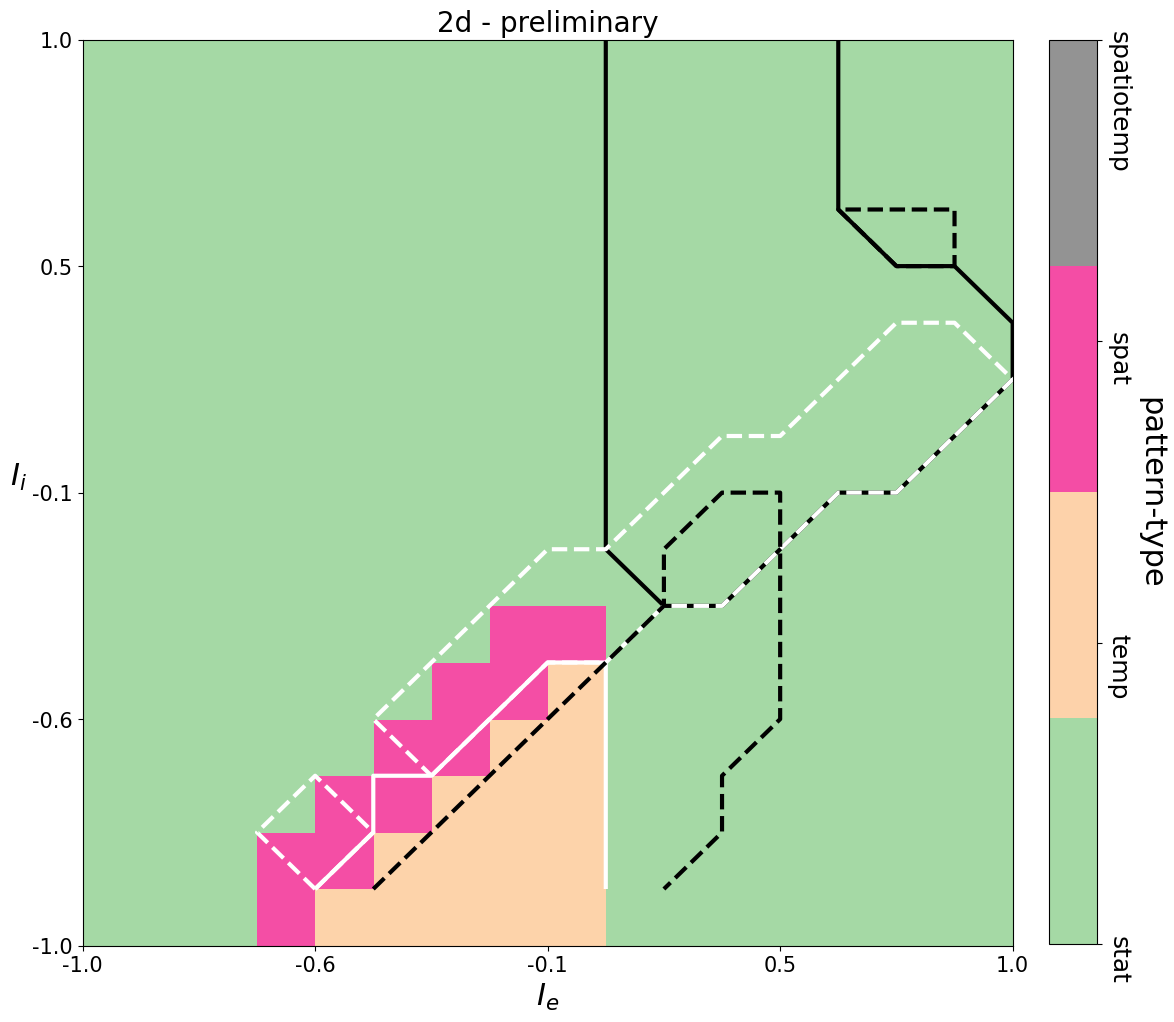

In [10]:
plotDiscreteMap(df, xaxis='I_e', yaxis='I_i', 
                #scatters = np.array([[0.42, -0.05], [-0.49, -0.8]]), 
                title='2d - preliminary', colorbar=True)#+ 'setting; ' + 'init. in down', colorbar = False)

In [8]:
df = pd.read_csv('csv/adaps_trial2.csv')
df_def1 = pd.read_csv('csv/high-default.csv')


#df_default_show = df_default_show[df_default_show['p_down']==3]
#a = df[df['turing']==1]
#a[a['p_down']==4]

#df_def1['p_down'][df_def1['I_i']>=0.4]=1
#df_def1['p_down'][df_def1['p_random']==4] = 4
df[df['double']!=0]

,Unnamed: 0,I_e,I_i,stability,static,dynamic,double,p_random,p_down
48,0,-0.4,-0.8,1.0,1,1,1,4,4
70,0,-0.3,-0.7,1.0,1,1,1,4,4
92,0,-0.2,-0.6,1.0,1,1,1,4,4
114,0,-0.1,-0.5,1.0,1,1,1,4,4
115,0,0.0,-0.5,1.0,1,1,1,4,4
136,0,0.0,-0.4,1.0,1,1,1,4,4
137,0,0.1,-0.4,1.0,1,1,1,4,4
138,0,0.2,-0.4,1.0,1,1,1,4,4
158,0,0.1,-0.3,1.0,1,0,1,4,4
159,0,0.2,-0.3,1.0,1,1,1,4,4


In [8]:
a = df_def1[df_def1['p_down']!=df_def1['p_random']]
a[a['I_e']<=-0.4]

,Unnamed: 0,I_e,I_i,stability,turing,p_random,p_down,wavenumber
36,0,-0.64,-1.00,0.0,0,4,3,NaN
45,0,-0.55,-1.00,0.0,0,2,3,NaN
46,0,-0.54,-1.00,0.0,0,2,3,NaN
47,0,-0.53,-1.00,0.0,0,2,3,NaN
48,0,-0.52,-1.00,0.0,0,2,3,NaN
...,...,...,...,...,...,...,...,...
7089,0,-0.46,-0.65,1.0,1,4,3,0.651073
7091,0,-0.44,-0.65,1.0,1,3,4,0.593718
7291,0,-0.45,-0.64,1.0,1,4,3,0.656427
7296,0,-0.40,-0.64,1.0,1,3,4,0.566418


In [53]:
df_def1[df_def1['p_down']!=df_def1['p_random']]

,Unnamed: 0,I_e,I_i,stability,turing,p_random,p_down,wavenumber
18,0,-0.64,-1.00,0.0,0,4,3,NaN
23,0,-0.54,-1.00,0.0,0,2,3,NaN
24,0,-0.52,-1.00,0.0,0,2,3,NaN
25,0,-0.50,-1.00,0.0,0,2,3,NaN
26,0,-0.48,-1.00,0.0,0,2,3,NaN
...,...,...,...,...,...,...,...,...
8669,0,0.68,0.70,1.0,0,1,3,NaN
8670,0,0.70,0.70,1.0,0,1,3,NaN
8767,0,0.62,0.72,1.0,0,1,3,NaN
8768,0,0.64,0.72,1.0,0,1,3,NaN


/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1082/1247230948.py:47: UserWarning: No contour levels were found within the data range.
  c2 = ax.contour(turings, origin='lower', vmin=0, vmax=1, levels=0, colors=['white'],
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1082/1247230948.py:49: UserWarning: No contour levels were found within the data range.
  c3 = ax.contour(compare, origin='lower', vmin=0, vmax=1, levels=0, colors=['black'],


AttributeError: 'bool' object has no attribute 'any'

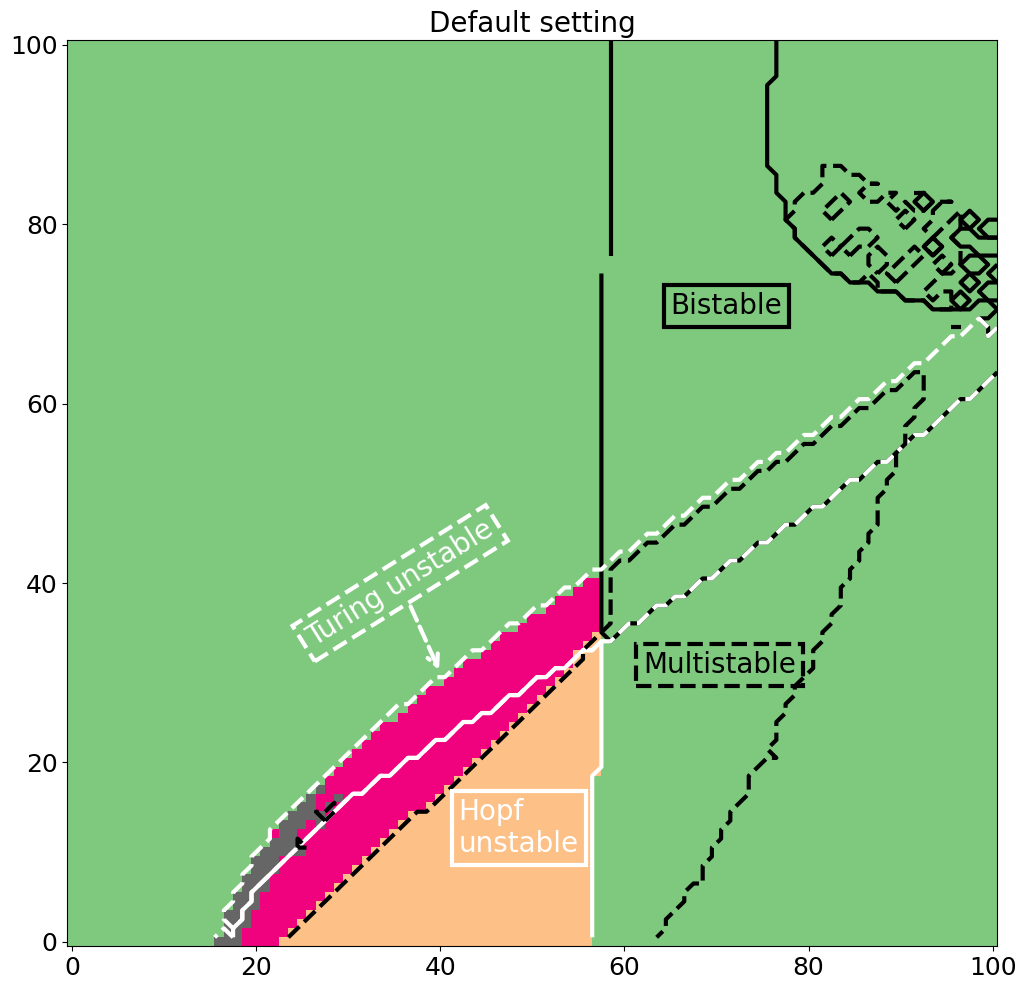

In [188]:
df_def = df_def1[df_def1['I_e']>=0.4]
df_def = df_def[df_def['I_e']<=0.9]
df_def = df_def[df_def['I_i']>=-0.13]
df_def = df_def[df_def['I_i']<=0.23]

plotDiscreteMap(df_def1, xaxis='I_e', yaxis='I_i', title='Default setting', colorbar=True )#+ 'setting; ' + 'init. in down', colorbar = False)

In [55]:
a = df_default[df_default['turing']==1]
a[a['p_random']==4]

,Unnamed: 0,I_e,I_i,stability,turing,p_random,p_down
816,0,-0.233333,-0.566667,1.0,1,4,4
878,0,-0.200000,-0.533333,1.0,1,4,4
940,0,-0.166667,-0.500000,1.0,1,4,4
1065,0,-0.066667,-0.433333,1.0,1,4,4
1127,0,-0.033333,-0.400000,1.0,1,4,4
1189,0,0.000000,-0.366667,1.0,1,4,4
1252,0,0.066667,-0.333333,1.0,1,4,4
1314,0,0.100000,-0.300000,1.0,1,4,4
1377,0,0.166667,-0.266667,1.0,1,4,4
1439,0,0.200000,-0.233333,1.0,1,4,4


In [39]:
df_adap = pd.read_csv('csv/adap_b05_taua1000.csv')

#df_adap_show = df_adap_show[df_adap_show['p_random']==2]

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2661/715855244.py:46: UserWarning: The following kwargs were not used by contour: 'interpolation'
  c1 = ax.contour(stabis, origin='lower', vmin=0, vmax=2, levels=1, cmap='YlGnBu',
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2661/715855244.py:48: UserWarning: No contour levels were found within the data range.
  c2 = ax.contour(turings, origin='lower', vmin=0, vmax=1, levels=0, cmap='RdGy',
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2661/715855244.py:50: UserWarning: No contour levels were found within the data range.
  c3 = ax.contour(compare, origin='lower', vmin=0, vmax=1, levels=0, colors='darkviolet',
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2661/715855244.py:50: UserWarning: The following kwargs were not used by contour: 'interpolation'
  c3 = ax.contour(compare, origin='lower', vmin=0, vmax=1, levels=0, colors='darkviolet',
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/

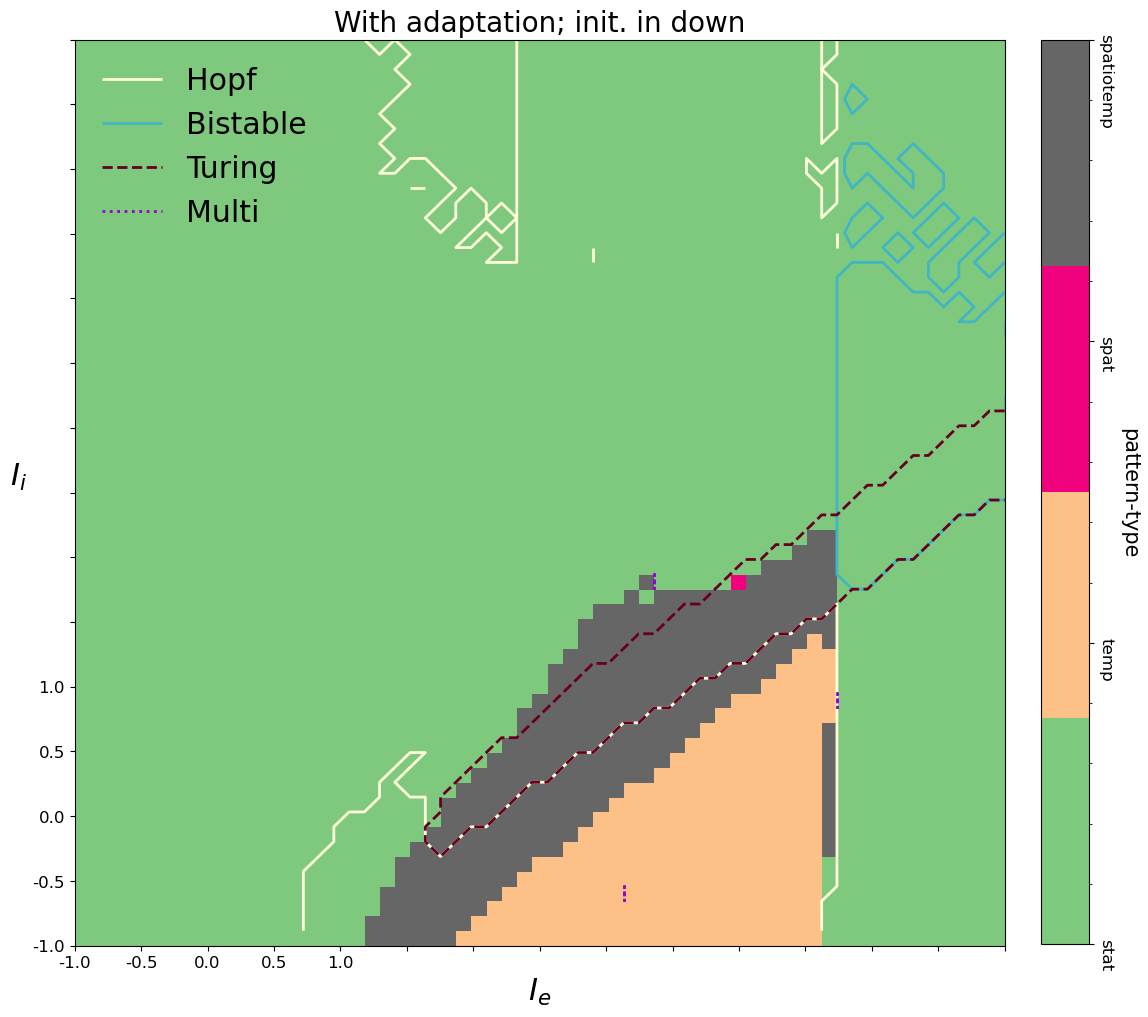

In [40]:
plotDiscreteMap(df_adap, title='With adaptation; init. in down', colorbar=True)#; rnd. init.' + r'$LC_{ae}$;', colorbar=False)

In [32]:
a = df_adap[df_adap['I_e']>=0.5]
a[a['p_random']==4]

,Unnamed: 0,I_e,I_i,stability,turing,p_random,p_down,wavenumber
2763,0,0.500000,-0.400000,0,0,4,4,NaN
2764,0,0.500000,-0.366667,0,0,4,4,NaN
2765,0,0.500000,-0.333333,0,0,4,4,NaN
2766,0,0.500000,-0.300000,1,1,4,4,0.627032
2767,0,0.500000,-0.266667,1,1,4,4,0.646736
2768,0,0.500000,-0.233333,1,1,4,4,0.672970
2769,0,0.500000,-0.200000,1,1,4,4,0.710853
2770,0,0.500000,-0.166667,1,1,4,4,0.780772
2825,0,0.533333,-0.366667,0,0,4,4,NaN
2826,0,0.533333,-0.333333,0,0,4,4,NaN


In [62]:
a = df_adap[df_adap['stability']==1]
a = a[a['I_i']>=-0.25]
a[a['p_random']==4]

,Unnamed: 0,I_e,I_i,stability,turing,p_random,p_down,wavenumber
2158,0,0.166667,-0.233333,1,0,4,1,NaN
2219,0,0.200000,-0.233333,1,0,4,4,NaN
2280,0,0.233333,-0.233333,1,0,4,1,NaN
2341,0,0.266667,-0.233333,1,0,4,4,NaN
2402,0,0.300000,-0.233333,1,0,4,4,NaN
2463,0,0.333333,-0.233333,1,0,4,4,NaN
2524,0,0.366667,-0.233333,1,0,4,4,NaN
2585,0,0.400000,-0.233333,1,1,4,4,0.772129
2646,0,0.433333,-0.233333,1,1,4,4,0.722527
2647,0,0.433333,-0.200000,1,1,4,3,0.842741


In [58]:
a = df_adap[df_adap['turing']==0]
a = a[a['stability']==1]
a = a[a['I_e']>0]

In [59]:
a[a['p_random']==4]

,Unnamed: 0,I_e,I_i,stability,turing,p_random,p_down,wavenumber
1907,0,0.033333,-0.466667,1,0,4,4,NaN
1908,0,0.033333,-0.433333,1,0,4,4,NaN
1909,0,0.033333,-0.400000,1,0,4,4,NaN
1969,0,0.066667,-0.433333,1,0,4,4,NaN
1970,0,0.066667,-0.400000,1,0,4,4,NaN
1971,0,0.066667,-0.366667,1,0,4,4,NaN
2031,0,0.100000,-0.400000,1,0,4,4,NaN
2032,0,0.100000,-0.366667,1,0,4,4,NaN
2033,0,0.100000,-0.333333,1,0,4,4,NaN
2034,0,0.100000,-0.300000,1,0,4,4,NaN


In [46]:
df_default[df_adap['p_random']!=df_adap['p_down']]

,Unnamed: 0,I_e,I_i,stability,turing,p_random,p_down,wavenumber
2137,0,0.166667,-0.933333,1,0,1,3,NaN
2138,0,0.166667,-0.900000,1,0,1,3,NaN
2158,0,0.166667,-0.233333,2,1,1,3,0.671460
2280,0,0.233333,-0.233333,2,1,1,3,0.639437
2281,0,0.233333,-0.200000,2,1,1,3,0.665384
2319,0,0.266667,-0.966667,1,0,1,3,NaN
2647,0,0.433333,-0.200000,1,0,1,3,NaN
2948,0,0.600000,-0.333333,1,0,1,3,NaN
3004,0,0.633333,-0.500000,1,0,1,1,NaN
3005,0,0.633333,-0.466667,1,0,1,1,NaN


In [39]:
a[a['p_down']!=1]

,Unnamed: 0,I_e,I_i,stability,turing,p_random,p_down,wavenumber
2156,0,0.166667,-0.300000,1,0,4,4,NaN
2157,0,0.166667,-0.266667,1,0,4,4,NaN
2218,0,0.200000,-0.266667,1,0,4,4,NaN
2219,0,0.200000,-0.233333,1,0,4,4,NaN
2279,0,0.233333,-0.266667,1,0,4,4,NaN
2281,0,0.233333,-0.200000,1,0,1,4,NaN
2341,0,0.266667,-0.233333,1,0,4,4,NaN
